In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow.keras.backend as K 

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

from math import sqrt

C:\Users\julia\tf_jupyter\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\julia\tf_jupyter\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\julia\tf_jupyter\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv("model_input_data/augment_24group_1620.csv")

In [3]:
data

,T_ID,YEAR,PCT,IDX,MERGE_IDX,HEADER_NO,era,avg,vs_era,vs_avg,...,K_9,vs_ERA,H_A,vs_K_9,vs_FIP,H_9,oSLG,vs_OPS,vs_WHIP,P2_WHIP_RT
0,LG,2016,0.608696,777,0,0,3.649770,0.296069,4.993723,0.268530,...,6.299708,5.183583,0.625000,6.367167,21.210083,9.306833,0.376583,0.714208,1.588458,1.592333
1,LG,2016,0.500000,1,1,0,5.358453,0.253317,4.555222,0.298349,...,7.024500,4.564292,0.500000,7.958750,25.981417,10.525375,0.411833,0.777333,1.417625,1.958208
2,LG,2016,0.478261,2,2,0,4.715603,0.291169,4.659483,0.274605,...,6.010167,4.835125,0.500000,6.593083,18.368167,9.547667,0.370792,0.717458,1.526958,1.786958
3,LG,2016,0.375000,3,3,0,5.584768,0.305842,5.148837,0.288889,...,5.717083,5.223208,0.541667,6.863167,19.183125,10.450250,0.444000,0.800958,1.615917,2.005667
4,LG,2016,0.458333,4,4,0,5.551402,0.297110,5.833333,0.288942,...,6.221583,5.848958,0.416667,6.665708,24.602000,10.233583,0.445000,0.804208,1.644917,2.142625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,SS,2020,0.583333,1,14,3,3.693396,0.263694,5.003187,0.252488,...,6.343750,5.094958,0.583333,6.964333,23.619042,8.625000,0.371750,0.688375,1.373667,1.572542
4096,SS,2020,0.583333,1,15,3,3.778302,0.265997,5.151025,0.254975,...,6.218750,5.251208,0.541667,7.011208,24.400292,8.708333,0.379583,0.696542,1.402583,1.575000
4097,SS,2020,0.583333,1,16,3,4.009479,0.270338,5.193950,0.261462,...,6.072917,5.292875,0.500000,6.886208,24.303083,9.020833,0.386208,0.709542,1.416458,1.635167
4098,SS,2020,0.583333,1,17,3,3.685714,0.265743,5.065175,0.257783,...,6.385417,5.167875,0.458333,7.011208,24.108625,8.911458,0.388792,0.707208,1.407208,1.547667


In [123]:
# tmp = data[["T_ID","YEAR","PCT","IDX","H_A"]] #최소한의 데이터

tmp = data.copy()


tmp = tmp[tmp["YEAR"]!=2020]
tmp.head(50)

train = tmp[tmp["IDX"]!=777]
test = tmp[tmp["IDX"]==777]

In [124]:
ttmp = train[(train["T_ID"]=='LG')]
ttmp = ttmp[(ttmp["YEAR"]==2016)]
ttmp

,T_ID,YEAR,PCT,IDX,MERGE_IDX,HEADER_NO,era,avg,vs_era,vs_avg,...,K_9,vs_ERA,H_A,vs_K_9,vs_FIP,H_9,oSLG,vs_OPS,vs_WHIP,P2_WHIP_RT
1,LG,2016,0.500000,1,1,0,5.358453,0.253317,4.555222,0.298349,...,7.024500,4.564292,0.500000,7.958750,25.981417,10.525375,0.411833,0.777333,1.417625,1.958208
2,LG,2016,0.478261,2,2,0,4.715603,0.291169,4.659483,0.274605,...,6.010167,4.835125,0.500000,6.593083,18.368167,9.547667,0.370792,0.717458,1.526958,1.786958
3,LG,2016,0.375000,3,3,0,5.584768,0.305842,5.148837,0.288889,...,5.717083,5.223208,0.541667,6.863167,19.183125,10.450250,0.444000,0.800958,1.615917,2.005667
4,LG,2016,0.458333,4,4,0,5.551402,0.297110,5.833333,0.288942,...,6.221583,5.848958,0.416667,6.665708,24.602000,10.233583,0.445000,0.804208,1.644917,2.142625
5,LG,2016,0.583333,5,5,0,5.400000,0.294471,5.091926,0.286756,...,6.891667,5.106250,0.416667,6.691250,18.554625,10.194792,0.401542,0.757000,1.514083,2.408083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,LG,2016,0.625000,4,93,0,5.130841,0.302817,5.255895,0.288942,...,6.881250,5.304167,0.458333,6.456875,19.565083,10.298958,0.400958,0.750708,1.560375,2.347458
94,LG,2016,0.478261,1,94,0,5.299065,0.285024,4.702962,0.285714,...,6.042708,4.842708,0.541667,6.630958,17.568083,10.106250,0.392250,0.746875,1.500458,1.931500
95,LG,2016,0.375000,2,95,0,5.333333,0.304447,4.852535,0.280516,...,5.642875,4.965625,0.500000,6.700292,19.344333,10.058333,0.430292,0.781125,1.605375,1.923625
96,LG,2016,0.416667,3,96,0,5.845794,0.295481,5.682028,0.300469,...,6.263250,5.671875,0.416667,6.389667,24.663333,10.775250,0.461042,0.832167,1.619458,2.225958


In [125]:
aaa = pd.DataFrame([])

for i in range(1,3):
    for c in list(set(list(ttmp.columns))-set(['T_ID','YEAR'])):
        aaa.loc[:,'shift_{}_{}'.format(c,i)] = ttmp.loc[:,c].shift(i)
        
aaa.loc[:,["IDX","MERGE_IDX","PCT"]] = ttmp.loc[:,["IDX","MERGE_IDX","PCT"]]

In [126]:
ttmp = aaa.copy()

In [127]:
ttmp.dropna(inplace = True)

In [128]:
ttmp_idx = list(ttmp.index)

In [129]:
drop_idx = []
for i in ttmp_idx:
    idx_num = ttmp.loc[i,'IDX']
    if idx_num < ttmp.loc[i,'shift_IDX_1'] or idx_num < ttmp.loc[i,'shift_IDX_2']:
        drop_idx.append(i)

In [130]:
shift_data = ttmp.drop(drop_idx).reset_index(drop = True)

# shift_data = pd.concat([shift_data, pd.get_dummies(data.T_ID)], axis = 1)

In [131]:
no_shift_lst= []
for i in list(shift_data.columns):
    if 'shift' not in i:
        no_shift_lst.append(i)

In [132]:
X_train = shift_data.drop(no_shift_lst,axis = 1)
y_train = shift_data[["PCT"]]

In [133]:
X_train.shape, y_train.shape

((49, 140), (49, 1))

In [141]:
sel_col = list(test.columns)

tmp5 = data[(data["IDX"]==5)&(data["T_ID"]=='LG')][sel_col]
tmp4 = data[(data["IDX"]==4) & (data["MERGE_IDX"]==4)&(data["T_ID"]=='LG')][sel_col]

In [142]:
test_df = pd.concat([test[test["T_ID"]=='LG'],tmp5,tmp4], axis = 0).sort_values(by=["YEAR","IDX"])

In [143]:
test_df = test_df[test_df["YEAR"]==2016]

In [144]:
bbb = pd.DataFrame([])

for i in range(1,3):
    for c in list(set(list(test_df.columns))-set(['T_ID','YEAR'])):
        bbb.loc[:,'shift_{}_{}'.format(c,i)] = test_df.loc[:,c].shift(i)
        
bbb.loc[:,["IDX","MERGE_IDX","PCT"]] = test_df.loc[:,["IDX","MERGE_IDX","PCT"]]


# for c in list(set(list(test_df.columns))-set(['T_ID','YEAR'])):
#     for i in range(1,3):
#         test_df.loc[:,'shift_{}_{}'.format(c,i)] = test_df.loc[:,c].shift(i)

# for i in range(1,3):
#     test_df.loc[:,'shift_{}_{}'.format('PCT',i)] = test_df.loc[:,'PCT'].shift(i)

In [145]:
test_df = bbb.copy()

In [147]:
test_tmp = test_df[test_df["IDX"]==777]
X_test = test_tmp.drop(no_shift_lst,axis = 1)
y_test = test_tmp[["PCT"]]

In [148]:
X_test

,shift_TA_1,shift_vs_DER_1,shift_vs_AVG_1,shift_HEADER_NO_1,shift_P_WHIP_RT_1,shift_vs_H_9_1,shift_vs_oOBP_1,shift_WHIP_1,shift_vs_ISO_1,shift_era_1,...,shift_vs_OBP_2,shift_oSLG_2,shift_vs_K_9_2,shift_vs_BB_9_2,shift_K_9_2,shift_vs_WHIP_2,shift_RC_2,shift_ERA_2,shift_avg_2,shift_vs_BA_2
0,0.739,0.663083,0.28075,0.0,1.950333,10.506667,0.339542,1.548125,0.116375,5.4,...,0.365458,0.445,6.665708,4.143,6.221583,1.644917,1.201167,5.592792,0.29711,0.280625


In [149]:
X_train_v = X_train.values
y_train_v = y_train.values

X_test_v = X_test.values
y_test_v = y_test.values

In [150]:
X_train_v.shape, y_train_v.shape, X_test_v.shape, y_test_v.shape

((49, 140), (49, 1), (1, 140), (1, 1))

In [153]:
X_train_t = X_train_v.reshape(X_train_v.shape[0], 2,70)
X_test_t = X_test_v.reshape(X_test_v.shape[0], 2,70)

In [154]:
X_train_t.shape, X_train_t[0]

((49, 2, 70),
 array([[7.54333333e-01, 6.69541667e-01, 2.68791667e-01, 0.00000000e+00,
         2.35179167e+00, 1.03035833e+01, 3.39291667e-01, 1.52133333e+00,
         9.83750000e-02, 4.71560322e+00, 2.00141667e+00, 9.54766667e+00,
         5.31250000e-01, 3.55625000e-01, 9.73000000e+02, 4.07500000e-01,
         7.58833333e-01, 4.58333333e-01, 4.03208333e-01, 2.49500000e-01,
         2.96458333e-01, 2.86125000e-01, 8.45500000e-01, 4.65948330e+00,
         5.00000000e-01, 7.11250000e-01, 2.74605103e-01, 2.86125000e-01,
         6.96458333e-01, 3.36875000e-01, 2.79666667e-01, 4.99908333e+00,
         5.00000000e-01, 4.14429167e+00, 4.83512500e+00, 7.17458333e-01,
         2.93666667e-01, 1.83681667e+01, 3.76750000e-01, 1.79695833e+00,
         3.67166667e-01, 2.71625000e-01, 1.89143750e+01, 7.15333333e-01,
         5.89875000e-01, 1.97179167e+00, 3.24333333e-01, 4.78260870e-01,
         2.00000000e+00, 6.85916667e-01, 2.88875000e-01, 9.73000000e+02,
         1.17083333e-01, 4.60900000e+

In [157]:
K.clear_session() 

model = Sequential()
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0)

model.add(LSTM(100,input_shape = (2,70))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               68400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 68,501
Trainable params: 68,501
Non-trainable params: 0
_________________________________________________________________


In [159]:
early_stop = EarlyStopping(monitor='loss', mode = 'min',patience=2, verbose=1)


hist1 = model.fit(X_train_t, y_train_v, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Train on 49 samples
Epoch 1/100
 1/49 [..............................] - ETA: 11sWARNING:tensorflow:Early stopping conditioned on metric `loss` which is not available. Available metrics are: 


UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/StatefulPartitionedCall]] [Op:__inference_distributed_function_4331]

Function call stack:
distributed_function -> distributed_function -> distributed_function


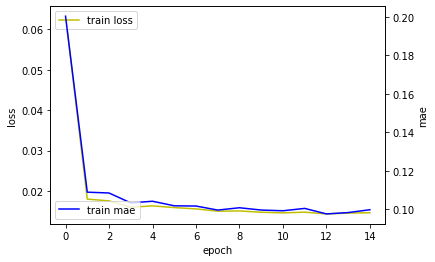

In [218]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')

acc_ax.plot(hist1.history['mae'], 'b', label='train mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [219]:
y_pred = model.predict(X_test_t)

In [220]:
pd.DataFrame({"y_pred":y_pred.reshape(-1), 
              "y":y_test_v.reshape(-1)})

,y_pred,y
0,0.479246,0.608696


In [221]:
y_pred

array([[0.47924638]], dtype=float32)

In [222]:
rms = sqrt(mean_squared_error(y_test_v, y_pred))
rms

0.1294492742289668

LG, 2016

In [220]:
pd.DataFrame({"y_pred":y_pred.reshape(-1), 
              "y":y_test_v.reshape(-1)})

,y_pred,y
0,0.479246,0.608696


In [221]:
y_pred

array([[0.47924638]], dtype=float32)

In [222]:
rms = sqrt(mean_squared_error(y_test_v, y_pred))
rms

0.1294492742289668

LG, 모든시즌

In [198]:
pd.DataFrame({"y_pred":y_pred.reshape(-1), 
              "y":y_test_v.reshape(-1)})

,y_pred,y
0,0.491760,0.608696
1,0.557402,0.434783
2,0.565112,0.416667
3,0.501496,0.541667


In [191]:
y_pred

array([[0.47158092],
       [0.5409802 ],
       [0.53747755],
       [0.48298073]], dtype=float32)

In [193]:
rms = sqrt(mean_squared_error(y_test_v, y_pred))
rms

0.1096787254758451

In [13]:
X_train = pd.read_csv("model_input_data/PCT_train_X.csv")
y_train = pd.read_csv("model_input_data/PCT_test_X.csv")

X_test = pd.read_csv("model_input_data/PCT_train_y.csv")
y_test = pd.read_csv("model_input_data/PCT_test_y.csv")

X_train = X_train[(X_train["shift_YEAR"] == 2019)&(X_train["LG"] == 1)]
X_test = X_test[(X_test["shift_YEAR"] == 2019)&(X_test["LG"]==1)]

# X_train = X_train[(X_train["LG"] == 1)]
# X_test = X_test[(X_test["LG"]==1)]


sel_col = ['shift_H_A',"shift_era", "shift_avg","shift_PCT","shift_SLG"]

train_index = X_train.index
test_index = X_test.index

y_train = y_train.iloc[train_index,:]
y_test = y_test.iloc[test_index,:]

# X_train = X_train[sel_col].reset_index(drop = True)
# X_test = X_test[sel_col].reset_index(drop = True)

In [14]:
X_train_v = X_train.values
y_train_v = y_train.values

X_test_v = X_test.values
y_test_v = y_test.values

In [15]:
X_train_t = X_train_v.reshape(X_train_v.shape[0], X_train_v.shape[1],1)
X_test_t = X_test_v.reshape(X_test_v.shape[0], X_train_v.shape[1],1)

In [16]:
X_train_t.shape

(73, 79, 1)

In [17]:
X_train_t[0]

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.37962500e+00],
       [3.81583333e-01],
       [2.01900000e+03],
       [3.53087500e+00],
       [2.70409301e+00],
       [4.23875000e-01],
       [1.64387500e+00],
       [9.81291667e+02],
       [2.59416667e-01],
       [5.41666667e-01],
       [6.04750000e-01],
       [1.30470833e+00],
       [8.28850000e+00],
       [2.74673008e-01],
       [2.59125000e-01],
       [2.44500000e-01],
       [2.66586248e-01],
       [2.99666667e-01],
       [7.18708333e-01],
       [4.58333333e-01],
       [3.48784725e+00],
       [4.16666667e-01],
       [3.49750000e-01],
       [4.67983333e+00],
       [2.15458333e-01],
       [2.98125000e-01],
       [7.18041667e-01],
       [7.66666667e-01],
       [3.38750000e-01],
       [1.54458333e+00],


In [56]:
K.clear_session() 

model = Sequential()
optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)

model.add(LSTM(40,input_shape = (X_train_v.shape[1],1))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [57]:
early_stop = EarlyStopping(monitor='loss', mode = 'min',patience=2, verbose=1)


hist1 = model.fit(X_train_t, y_train_v, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Train on 292 samples
Epoch 1/100
292/292 [==============================] - 5s 17ms/sample - loss: 0.0266 - mae: 0.1281
Epoch 2/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0146 - mae: 0.0979
Epoch 3/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0147 - mae: 0.0970
Epoch 4/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0146 - mae: 0.0963
Epoch 5/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0145 - mae: 0.0966
Epoch 6/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0145 - mae: 0.0962
Epoch 7/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0143 - mae: 0.0963
Epoch 8/100
292/292 [==============================] - 3s 10ms/sample - loss: 0.0142 - mae: 0.0960
Epoch 9/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0145 - mae: 0.0958
Epoch 10/100
292/292 [==============================] - 3s 10ms/sample - loss: 0.0142 - mae: 0.

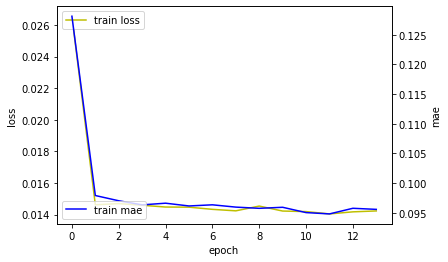

In [58]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')

acc_ax.plot(hist1.history['mae'], 'b', label='train mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [59]:
y_pred = model.predict(X_test_t)

In [60]:
pd.DataFrame({"y_pred":y_pred.reshape(-1), 
              "y":y_test_v.reshape(-1)})

,y_pred,y
0,0.516332,0.608696
1,0.487553,0.434783
2,0.524546,0.416667
3,0.516562,0.541667
4,0.494340,0.391304


In [61]:
y_test_v

array([[0.60869565],
       [0.43478261],
       [0.41666667],
       [0.54166667],
       [0.39130435]])

In [62]:
rms = sqrt(mean_squared_error(y_test_v, y_pred.astype(np.float64).reshape(5,1)))
rms

0.08270456663119312